In [1]:
# Author: Brent Artuch
# Date: 2024-10-16

import sympy as sp
from sympy.physics.quantum import *
import numpy as np
from IPython.display import *
Image("Diagrams/QuantumOracle.png")
Image("Diagrams/DeutchsAlgorithm.png")

# Qiskit and Q# libraries
import qsharp
from qiskit.quantum_info import Operator, Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator

sp.init_printing()

## Quatum Oracles
![title](Diagrams/QuantumOracle.png) <br>
Another way to represent this is:<br>
\begin{align*}
\ket{x}\ket{y}^{ \ \underrightarrow{U_f} \ }\ket{x}\ket{y \oplus f(x)}
\end{align*}
where $U_f$ is the Quantum Oracle and $x$ and $y$ are inputs/outputs.<br>
<br>
The four possible outcomes are:
\begin{align*}
&\ket{0}\ket{0}^{ \ \underrightarrow{U_f} \ }\ket{0}\ket{f(0)}\\
&\ket{0}\ket{1}^{ \ \underrightarrow{U_f} \ }\ket{0}\ket{1}\\
&\ket{1}\ket{0}^{ \ \underrightarrow{U_f} \ }\ket{1}\ket{f(1)}\\
&\ket{1}\ket{1}^{ \ \underrightarrow{U_f} \ }\ket{1}\ket{1}\\
\end{align*}

## Phase Oracle
To acces all of the possible outputs of the Quantum Oracle, we need a method for getting both $f(0)$ and $f(1)$ that is shown as follows:
\begin{align*}
\ket{x}\ket{-}&=\ket{x}\frac{1}{\sqrt{2}}(\ket{0}-\ket{1})\\
&=\frac{1}{\sqrt{2}}(\ket{x}\ket{0}-\ket{x}\ket{1})
\end{align*}
Now we can query the oracle $U_f$:
\begin{align*}
&^{ \ \underrightarrow{U_f} \ }\frac{1}{\sqrt{2}}(\ket{x}\ket{0 \oplus f(x)}-\ket{x}\ket{1 \oplus f(x)})\\
&=\begin{cases} 
      \frac{1}{\sqrt{2}}(\ket{x}\ket{0}-\ket{x}\ket{1}) & f(x)=0 \\
      \frac{1}{\sqrt{2}}(\ket{x}\ket{1}-\ket{x}\ket{0}) & f(x)=1\\ 
   \end{cases}\\
&=\begin{cases} 
  \ket{x}\ket{-} & f(x)=0 \\
  -\ket{x}\ket{-} & f(x)=1\\ 
\end{cases}\\
&=(-1)^{f(x)}\ket{x}\ket{-}
\end{align*}
And the general formula for the phase oracle is:
\begin{align*}
\ket{x}^{ \ \underrightarrow{U_f} \ }(-1)^{f(x)}\ket{x}
\end{align*}

## Deutsch's Algorithm
We have two classical bits $b_0$ and $b_1$. We want to know whether the number of ones among the two bits is even or odd. The classical solution is to query the oracle $U_f$ twice plugging in $0$ and then $1$ into $f(x)$ to find the value of each bit. Then the XOR of the two bits is taken to determine whether the pair has an odd or even number of ones. The quantum solution can solve this problem in one step as shown by this qunatum circuit:
![title](Diagrams/DeutchsAlgorithm.png) <br>
Now we will walk through the operations of this cirucit mathematically. First, to put the controll bit into the minus state, we need to flip ($X$-gate) the base state ($\ket{0}$) to the excited state ($\ket{1}$) and then apply the $H$-gate to get the minus state ($\ket{-}$). 
\begin{align*}
HX\ket{0}=H\ket{1}=\frac{1}{\sqrt{2}}(\ket{0}-\ket{1})=\ket{-}
\end{align*}
Now we move down to the target qubit and apply the $H$-gate :
\begin{align*}
H\ket{0}=\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})
\end{align*}
Next we apply the Quantum Oracle $U_f$ :
\begin{align*}
\frac{1}{\sqrt{2}}((-1)^{f(0)}\ket{0}+(-1)^{f(1)}\ket{1})\\
\end{align*}
And set $f(0)=b_0$ and $f(1)=b_1$ :
\begin{align*}
=\frac{1}{\sqrt{2}}((-1)^{b_0}\ket{0}+(-1)^{b_1}\ket{1})\\
\end{align*}
Then factor $(-1)^{b_0}$ :
\begin{align*}
=(-1)^{b_0}\frac{1}{\sqrt{2}}(\ket{0}+(-1)^{b_1-b_0}\ket{1})\\
\end{align*}
And we get :
\begin{align*}
&=\begin{cases} 
  (-1)^{b_0}\frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) & b_0=b_1 \\
  (-1)^{b_0}\frac{1}{\sqrt{2}}(\ket{0}-\ket{1}) & b_0\not =b_1\\ 
\end{cases}\\
&=\begin{cases} 
  (-1)^{b_0}\ket{+} & b_0=b_1 \\
  (-1)^{b_0}\ket{-} & b_0\not =b_1\\ 
\end{cases}
\end{align*}  
Apply the Hadamard gate:
\begin{align*}
&=\begin{cases} 
  (-1)^{b_0}H\ket{+} & b_0=b_1 \\
  (-1)^{b_0}H\ket{-} & b_0\not =b_1\\ 
\end{cases}\\
&=\begin{cases} 
  (-1)^{b_0}\ket{0} & b_0=b_1 \\
  (-1)^{b_0}\ket{1} & b_0\not =b_1\\ 
\end{cases}
\end{align*}
And lastly drop the global phase:
=\begin{cases} 
  \ket{0} & b_0=b_1 \\
  \ket{1} & b_0\not =b_1\\ 
\end{cases}
Therefore, when we measure the target qubit, if we get $\ket{0}$ the parity is even becuase $b_0=b_1$ and if we get $\ket{1}$ the parity is odd becuase $b_0\not =b_1$ (ie. $1=1$, $0=0$, $1\not = 0$, and $0\not = 1$)

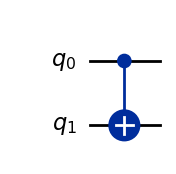

In [2]:
# Qiskit implementation of the Deutsch Algorithm

def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

display(deutsch_function(2).draw("mpl"))

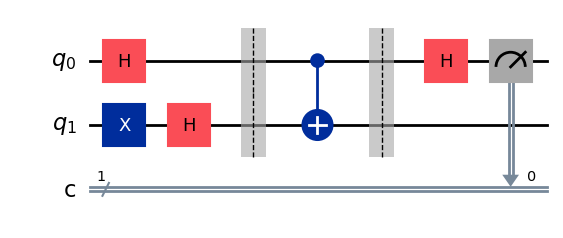

In [3]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

display(compile_circuit(deutsch_function(2)).draw("mpl"))

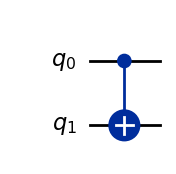

'balanced'

In [4]:
def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

f = deutsch_function(2)
display(f.draw("mpl"))
display(deutsch_algorithm(f))